# Web Scraping with Python

- Websites are a fantastic source for data 
- Webscraping refers to the extraction of data from a website
- Data Engineers could use it as part of the data gathering
- Software Engineers might use it to obtain information to build an application
- Need to careful around the legality. Make sure you're not violating any terms of service.

# Main two ways to gain information from a website
- Use of website API
- Access the HTML of the webpage and extract useful information/data from it

# Many Python packages for Web Scraping

- Requests
- BeautifulSoup
- Scrapy
- Selenium

# Challenges of Web Scraping

- Variety: every website format is different. Need to tailor you webscraper dependant on the website.
- Durability: Websites constantly change. When these changes happen, often the webscraper also needs to be changed. Scripts may also be unstable due to websites constantly being developed.

# Steps for Web Scraping 
Tutorial: https://realpython.com/beautiful-soup-web-scraper-python/#what-is-web-scraping
### 1. Inspect the data source (https://realpython.github.io/fake-jobs/)
     - Explore the website
     - Look at the URL
     - Use developer tools

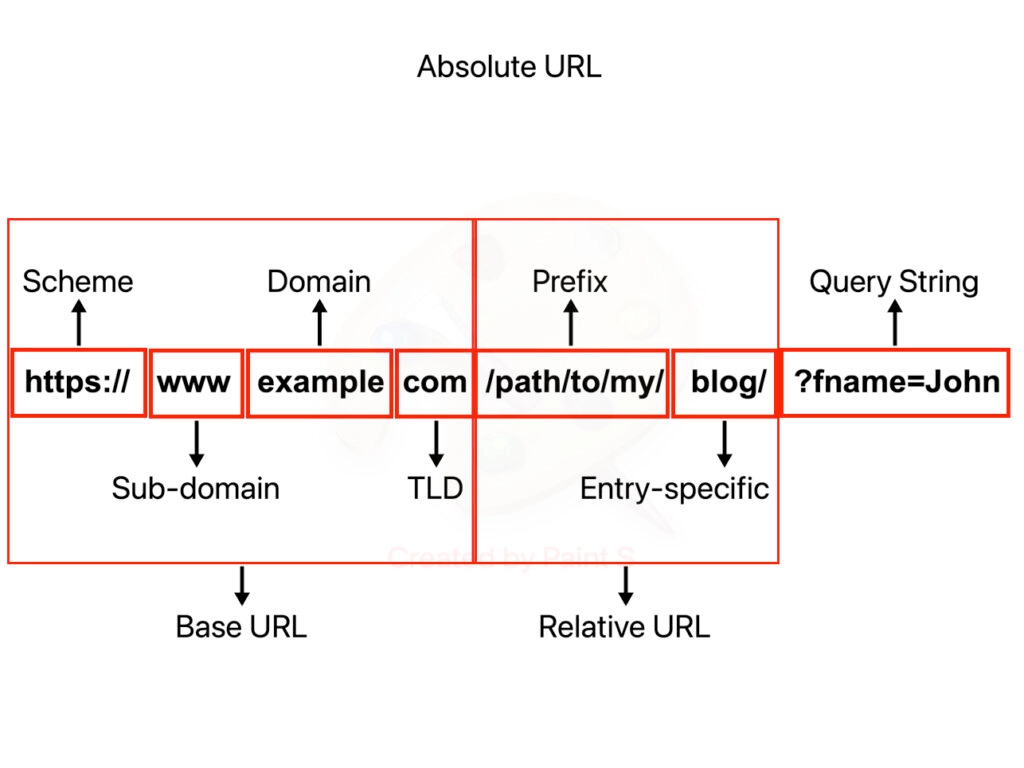

In [ ]:
### Keyboard shortcuts for developer tools

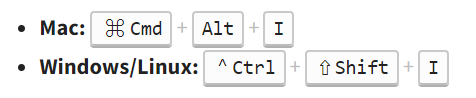

### 2. Scrape HTML content from the page
- Static Websites
- Different types of websites: Hidden Websites and Dynamic Websites.

In [1]:
#Look at the requests module
import requests

In [2]:
URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

print(page.text)

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="column is-half">
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-

In [3]:
# Can use HTML formatter to make the code look better: https://webformatter.com/html

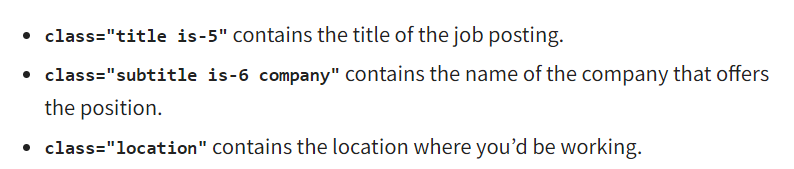

### Step 3: Parse HTML Code with Beautiful Soup
- Beautiful Soup
- Find elements by ID
- Find elements by HTML Class Name
- Find Elements by Class Name and Text Content

#### Beautiful Soup

- Beautiful soup parses structured data.
- Interact with code in a similar way that you would with developer tools
- Extract Text From HTML Elements
- Passing Functions to a Beautiful Soup Method

In [4]:
from bs4 import BeautifulSoup

In [5]:
soup = BeautifulSoup(page.content, "html.parser")
# Pass page.content instead of page.text to avoid problems with character encoding. .content attribute holds raw bytes.

#### Find Elements by ID
- Every element can have an id attribute assigned. 
- id makes it uniquely identifiable on the page
- Let's try switching back to developer tools and finding an ID (maybe try "ResultsContainer")

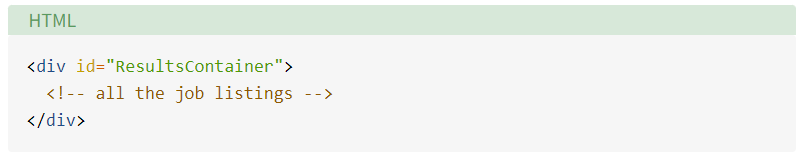

In [7]:
results = soup.find(id="ResultsContainer")

In [8]:
print(results.prettify())

<div class="columns is-multiline" id="ResultsContainer">
 <div class="column is-half">
  <div class="card">
   <div class="card-content">
    <div class="media">
     <div class="media-left">
      <figure class="image is-48x48">
       <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
      </figure>
     </div>
     <div class="media-content">
      <h2 class="title is-5">
       Senior Python Developer
      </h2>
      <h3 class="subtitle is-6 company">
       Payne, Roberts and Davis
      </h3>
     </div>
    </div>
    <div class="content">
     <p class="location">
      Stewartbury, AA
     </p>
     <p class="is-small has-text-grey">
      <time datetime="2021-04-08">
       2021-04-08
      </time>
     </p>
    </div>
    <footer class="card-footer">
     <a class="card-footer-item" href="https://www.realpython.com" target="_blank">
      Learn
     </a>
     <a class="card-footer-item" href=

#### Find elements by HTML Class Name

- Can see that every job posting is wrapped in a div element with the class card-content

In [9]:
job_elements = results.find_all("div", class_="card-content")

In [10]:
for job_element in job_elements:
    print(job_element)

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://fil

In [11]:
# Can find the child elements using the find method()

for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element)
    print(company_element)
    print(location_element)
    print()
    
# Think about objects, each job_element is a BeautifulSoup object

<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
<p class="location">
        Stewartbury, AA
      </p>

<h2 class="title is-5">Energy engineer</h2>
<h3 class="subtitle is-6 company">Vasquez-Davidson</h3>
<p class="location">
        Christopherville, AA
      </p>

<h2 class="title is-5">Legal executive</h2>
<h3 class="subtitle is-6 company">Jackson, Chambers and Levy</h3>
<p class="location">
        Port Ericaburgh, AA
      </p>

<h2 class="title is-5">Fitness centre manager</h2>
<h3 class="subtitle is-6 company">Savage-Bradley</h3>
<p class="location">
        East Seanview, AP
      </p>

<h2 class="title is-5">Product manager</h2>
<h3 class="subtitle is-6 company">Ramirez Inc</h3>
<p class="location">
        North Jamieview, AP
      </p>

<h2 class="title is-5">Medical technical officer</h2>
<h3 class="subtitle is-6 company">Rogers-Yates</h3>
<p class="location">
        Davidville, AP
      </p>

<h2 class="t

#### Extract Text From HTML Elements 
- Only want to extract title, company and location from each job_element
- .text returns only the text content

In [12]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text)
    print(company_element.text)
    print(location_element.text)
    print()

Senior Python Developer
Payne, Roberts and Davis

        Stewartbury, AA
      

Energy engineer
Vasquez-Davidson

        Christopherville, AA
      

Legal executive
Jackson, Chambers and Levy

        Port Ericaburgh, AA
      

Fitness centre manager
Savage-Bradley

        East Seanview, AP
      

Product manager
Ramirez Inc

        North Jamieview, AP
      

Medical technical officer
Rogers-Yates

        Davidville, AP
      

Physiological scientist
Kramer-Klein

        South Christopher, AE
      

Textile designer
Meyers-Johnson

        Port Jonathan, AE
      

Television floor manager
Hughes-Williams

        Osbornetown, AE
      

Waste management officer
Jones, Williams and Villa

        Scotttown, AP
      

Software Engineer (Python)
Garcia PLC

        Ericberg, AE
      

Interpreter
Gregory and Sons

        Ramireztown, AE
      

Architect
Clark, Garcia and Sosa

        Figueroaview, AA
      

Meteorologist
Bush PLC

        Kelseystad, AA
      

Audiolo

In [ ]:
# Lots of whitespace, can we think of ways to manipulate these? 

#### Find Elements by Class Name and Text Content

- All job titles are kept within h2 objects
- To filter for specific jobs, you can use the string argument 

In [14]:
python_jobs = results.find_all("h2", string="Python")

In [15]:
python_jobs

[]

In [ ]:
# Nothing there, why?

#### Passing Functions to a Beautiful Soup Method

In [16]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

In [22]:
for job in python_jobs:
    print(job.text)

Senior Python Developer
Software Engineer (Python)
Python Programmer (Entry-Level)
Python Programmer (Entry-Level)
Software Developer (Python)
Python Developer
Back-End Web Developer (Python, Django)
Back-End Web Developer (Python, Django)
Python Programmer (Entry-Level)
Software Developer (Python)


#### Additional Websites for Web Scraping

https://proxyway.com/guides/best-websites-to-practice-your-web-scraping-skills